In [1]:
using Random
using PyPlot

In [71]:
function gen_config(p, q, l, t, periodic)
    l = div(l, 2)
    function f_odd(x)
        (x < p) && (return 0)
        (x < p + (1 - p) * q) && (return 1)
        return 2
    end
    function f_even(x)
        (x < p) && (return 0)
        (x < p + (1 - p) * q) && (return 2)
        return 1
    end
    config = Array{Int, 1}[]
    for _ in 1:t
        tmp = rand(l)
        layer = f_odd.(tmp)
        if !periodic
            layer[end] = 2
        end
        push!(config, layer)
        tmp = rand(l)
        layer = f_even.(tmp)
        push!(config, layer)
    end
    return config
end

function find_next_prev(config, idx)
    T, L = length(config), 2 * length(config[1])
    t, l = idx[1], idx[2]
#     prev, next = CartesianIndex(1, 1), CartesianIndex(1, 1)
    a1, b1, a2, b2 = max(t-1, 1), div(l+1,2), min(t, T), mod(div(l, 2) - 1, div(L, 2)) + 1
    k1, k2 = isodd(l) ? (mod(l, L)+1, mod(l-2, L)+1) : (mod(l-2, L)+1, mod(l, L)+1)
    if iseven(t)
        b1, b2 = b2, b1
        k1, k2 = k2, k1
    end
    g1, g2 = config[a1][b1], config[a2][b2]
    (t==1) && (g1=1)
    (t==T+1) && (g2=1)
    (t==T+1) && (isodd(l) ? (k2=l+1) : (k2=l-1))
    (g1==0) && (prev = CartesianIndex(t-1, k1))
    (g1==1) && (prev = CartesianIndex(t, k1))
    (g1==2) && (prev = CartesianIndex(t-1, l))
    (g2==0) && (next = CartesianIndex(t+1, k2))
    (g2==1) && (next = CartesianIndex(t, k2))
    (g2==2) && (next = CartesianIndex(t+1, l))
    return prev, next
end
    
   
function config2loops(config)
    T = length(config)
    L = 2 * length(config[1])
    loops = Array{CartesianIndex{2}, 1}[]
    not_read = fill(true, T + 1, L)
    while true
        start = findfirst(not_read)
        (start == nothing) && break
        idx = start
        loop = CartesianIndex{2}[]
        while true
            not_read[idx] = false
            push!(loop, idx)
            prev, next = find_next_prev(config, idx)
            if (length(loop)>2) && (prev==start || next==start)
                break
            end
            idx = not_read[next] ? next : prev
        end
        push!(loops, loop)
    end
    return loops
end

function visualize_loops(loops)
    ax = subplot()
    for loop in loops
        y = [a[1] for a in loop]
        x = [a[2] for a in loop]
        push!(y, loop[1][1])
        push!(x, loop[1][2])
        ax.plot(x, y)
    end
    return ax
end

function visualize_loop2(loops)
    ax = subplot()
    ls = [length(loop) for loop in loops]
    i = argmax(ls)
    for j in 1:length(loops)
        loop = loops[j]
        y = [a[1] for a in loop]
        x = [a[2] for a in loop]
        push!(y, loop[1][1])
        push!(x, loop[1][2])
        if j==i
            ax.plot(x, y, color="red")
        else
            ax.plot(x, y, color="grey")
        end
    end
    return ax
end

visualize_loop2 (generic function with 1 method)

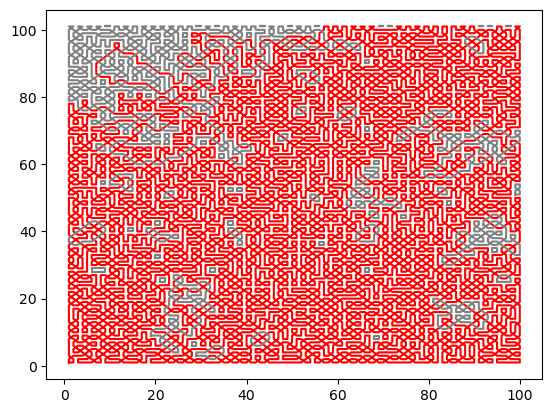

PyObject <AxesSubplot:>

In [73]:
p = 0.5
q = 0.6
l = 100
t = 50
periodic = false

config = gen_config(p, q, l, t, periodic)
loops = config2loops(config)
ax = visualize_loop2(loops)

In [88]:
find_next_prev(config, (2,1))

(CartesianIndex(1, 0), CartesianIndex(2, 2))